In [1]:
from sklearn import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
X,y = datasets.load_diabetes(return_X_y=True)
x_1 = keras.Input(shape=(len(X[0]),), name='x_1')
b0=tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None
)(x_1)
h1_1 = layers.Dense(30, activation='relu')(b0)
b1=tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None
)(h1_1)
h1_2 = layers.Dense(20, activation='relu')(b1)
b2=tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None
)(h1_2)
h1_3 = layers.Dense(1, activation='linear')(b2)
model = keras.Model(inputs=[x_1], outputs=h1_3)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_1 (InputLayer)             [(None, 10)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense (Dense)                (None, 30)                330       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21    

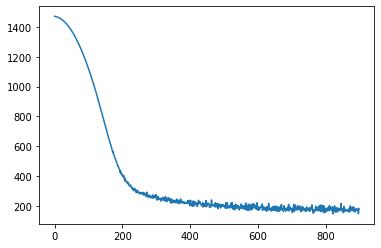

In [2]:
model.compile(optimizer='adam',loss=tf.keras.losses.Huber(delta=10))
history = model.fit(X,y,batch_size=60,epochs=900,verbose=0)
plt.plot(history.history['loss'])
plt.show()

In [3]:
yp=model.predict(X)

看似有一定程度的相關性


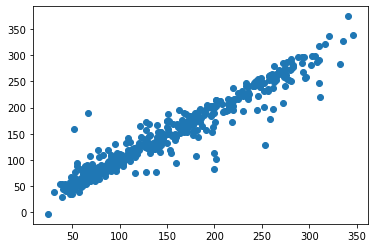

In [4]:
plt.scatter(y,yp)
plt.show
print("看似有一定程度的相關性")

In [5]:
print("我們將血壓資料進行刪除")
nbX=[]
for i in X:
    nbX.append(np.delete(i,3))
nbX=np.array(nbX)

我們將血壓資料進行刪除


In [6]:
x_2 = keras.Input(shape=(len(nbX[0]),), name='x_2')
b_0=tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None
)(x_2)
h2_1 = layers.Dense(30, activation='relu')(b_0)
b_1=tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None
)(h2_1)
h2_2 = layers.Dense(20, activation='relu')(b_1)
b_2=tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None
)(h2_2)
h2_3 = layers.Dense(1, activation='linear')(b_2)
model2 = keras.Model(inputs=[x_2], outputs=h2_3)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_2 (InputLayer)             [(None, 9)]               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 9)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 30)                300       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
batch_normalization_5 (Batch (None, 20)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21  

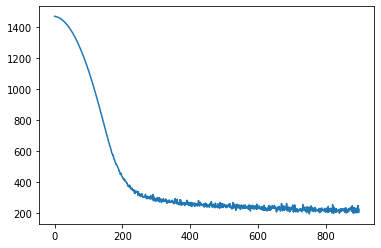

In [7]:
model2.compile(optimizer='adam',loss=tf.keras.losses.Huber(delta=10))
history = model2.fit(nbX,y,batch_size=60,epochs=900, verbose=0)
plt.plot(history.history['loss'])
plt.show()

In [8]:
nyp=model2.predict(nbX)

可明顯看出沒有血壓的資料相關性較低


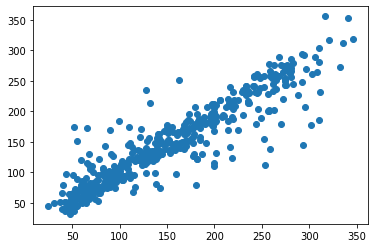

In [9]:
plt.scatter(y,nyp)
plt.show
print("可明顯看出沒有血壓的資料相關性較低")

將兩圖放在一起比較


<function matplotlib.pyplot.show(close=None, block=None)>

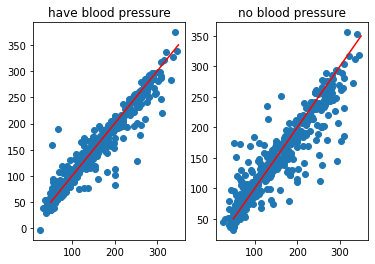

In [10]:
print("將兩圖放在一起比較")
plt.figure()
plt.subplot(1,2,1)
plt.title("have blood pressure")
plt.plot([50,350],[50,350],'r')
plt.scatter(y,yp)
plt.subplot(1,2,2)
plt.title("no blood pressure")
plt.plot([50,350],[50,350],'r')
plt.scatter(y,nyp)
plt.show

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
havebp=0
nobp=0
kf=KFold(n_splits=10,shuffle=True)
for train_index,test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model.fit(X_train,y_train,batch_size=60,epochs=900, verbose=0)
    yp=model.predict(X_test)
    havebp+=mean_squared_error(y_test,yp)
for train_index,test_index in kf.split(nbX):
    X_train,X_test=nbX[train_index],nbX[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model2.fit(X_train,y_train,batch_size=60,epochs=900, verbose=0)
    nyp=model2.predict(X_test)
    nobp+=mean_squared_error(y_test,nyp)
havebp/=10
nobp/=10
print("含血壓資料之mean_squared_error:",havebp)
print("無血壓資料之mean_squared_error:",nobp)

含血壓資料之mean_squared_error: 1154.9318322003598
無血壓資料之mean_squared_error: 1768.8766840230169


In [12]:
print("由上面分析我們發現無血壓資料之mean_squared_error相較於含血壓資料之mean_squared_error高了%f"%(nobp-havebp))
print("因此我給出“Average blood pressure” is an important factor for diabetes disease!的結論")

由上面分析我們發現無血壓資料之mean_squared_error相較於含血壓資料之mean_squared_error高了613.944852
因此我給出“Average blood pressure” is an important factor for diabetes disease!的結論


In [13]:
ry=model.predict(X)
ry=np.squeeze(ry)

data X:residual plot


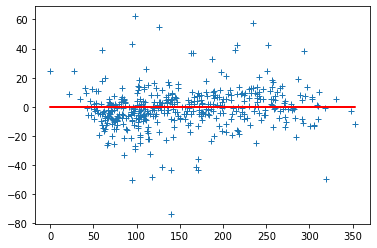

In [14]:
print("data X:residual plot")
ty=np.zeros_like(ry)
plt.plot(ry,y-ry,'+')
plt.plot(ry,ty,color='r')
plt.show()

In [15]:
import autokeras as ak
reg = ak.StructuredDataRegressor(overwrite=True,max_trials=3)
reg.fit(X,y)
predicted_y = reg.predict(X)

Trial 3 Complete [00h 00m 03s]
val_loss: 2070.43115234375

Best val_loss So Far: 2070.43115234375
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit
Epoch 1/13
14/14 [==============================] - 0s 921us/step - loss: 11596.9443 - mean_squared_error: 11596.9443
Epoch 2/13
14/14 [==============================] - 0s 844us/step - loss: 5158.1851 - mean_squared_error: 5158.1851
Epoch 3/13
14/14 [==============================] - 0s 921us/step - loss: 3813.8467 - mean_squared_error: 3813.8467
Epoch 4/13
14/14 [==============================] - 0s 921us/step - loss: 3612.4714 - mean_squared_error: 3612.4714
Epoch 5/13
14/14 [==============================] - 0s 846us/step - loss: 3647.5332 - mean_squared_error: 3647.5332
Epoch 6/13
14/14 [==============================] - 0s 922us/step - loss: 3403.8677 - mean_squared_error: 3403.8677
Epoch 7/13
14/14 [==============================] - 0s 921us/step - loss: 3279.8450 - mean_squared_error: 3279.8450
Epoch 8/13
14/14 [

In [16]:
print("使用autokeras所得到之結果")
print(predicted_y)

使用autokeras所得到之結果
[[218.55995 ]
 [ 50.20132 ]
 [181.436   ]
 [191.45316 ]
 [ 95.112564]
 [112.515114]
 [ 44.815174]
 [126.16151 ]
 [155.78363 ]
 [207.39713 ]
 [117.79388 ]
 [ 89.04478 ]
 [ 77.88424 ]
 [142.554   ]
 [ 74.77306 ]
 [156.55151 ]
 [199.14221 ]
 [193.8265  ]
 [141.24445 ]
 [103.63729 ]
 [113.81107 ]
 [ 48.348278]
 [123.30466 ]
 [292.30707 ]
 [158.6974  ]
 [122.45029 ]
 [105.976555]
 [154.64078 ]
 [115.58213 ]
 [237.28299 ]
 [144.95003 ]
 [ 63.708324]
 [268.87347 ]
 [ 79.824196]
 [ 70.74201 ]
 [119.7439  ]
 [195.22629 ]
 [125.009605]
 [260.79083 ]
 [115.51725 ]
 [160.22327 ]
 [114.66308 ]
 [119.39765 ]
 [ 98.48675 ]
 [223.36028 ]
 [ 97.99125 ]
 [149.23088 ]
 [138.99985 ]
 [ 82.8528  ]
 [157.56786 ]
 [130.7888  ]
 [162.84389 ]
 [123.08077 ]
 [127.52119 ]
 [124.69632 ]
 [ 61.718597]
 [195.39722 ]
 [ 66.837135]
 [103.91117 ]
 [146.79681 ]
 [ 92.68435 ]
 [162.09637 ]
 [ 35.564022]
 [125.64468 ]
 [128.85213 ]
 [155.50311 ]
 [132.99387 ]
 [107.81907 ]
 [ 99.36837 ]
 [108.96043 ]
 [

<function matplotlib.pyplot.show(close=None, block=None)>

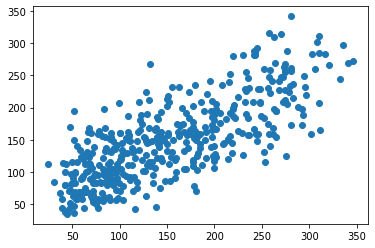

In [17]:
plt.scatter(y,predicted_y)
plt.show

使用autokeras 並採用data X的residual plot


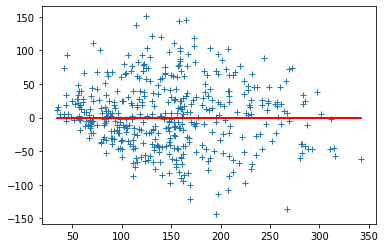

In [18]:
print("使用autokeras 並採用data X的residual plot")
predicted_y=np.squeeze(predicted_y)
nty=np.zeros_like(predicted_y)
plt.plot(predicted_y,y-predicted_y,'+')
plt.plot(predicted_y,nty,color='r')
plt.show()